In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline


In [3]:
all_data = pd.read_csv("LendingClub_LoanStats3a_v2.csv")

C:\Users\joseph.robie\Dropbox\Ongoing_Learning\Thinkful\Anaconda3.5\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Introduction:**

This Prep Course Capstone Project was performed on LendingClub's loan statistics for over 40,000 loanees.  Many of the columns provided in the CSV file have information on the loan itself as well as the loanee.  Such columns include the amount of the loan requested, the amount of the loan funded, the term of the loan, investment grade of the loanee, employment history, the purpose of the loan, and loanee location.  Certain columns were selected for further analysis to better understand the relationship among key data points such as the number of loans, loan volume, and average loan size to loan purpose, annual income, and investment rating.

Further analysis was also conducted on number of loans by location, percentage of loans that were charged off per investment grade, as well as seasonality in lending.

**First Analysis-->**

Hypothesis – On average, larger loans, as well as a higher number of loans, are given to customers with longer employment histories, home ownership, higher annual income, a “verified” income status, a small business purpose, and a higher “grade” rating.  Also, shorter term loans are generally provided to loanees.

Key Questions to Test: What is the breakout in loan size and number of loans given to customers by employment history length, home ownership, annual income, term, verification status, purpose, and grade?  Second, is there a strong relationship between loan amount requested and the size of the loan provided?  Finally, is there a strong relationship between the loan amount requested and annual income?

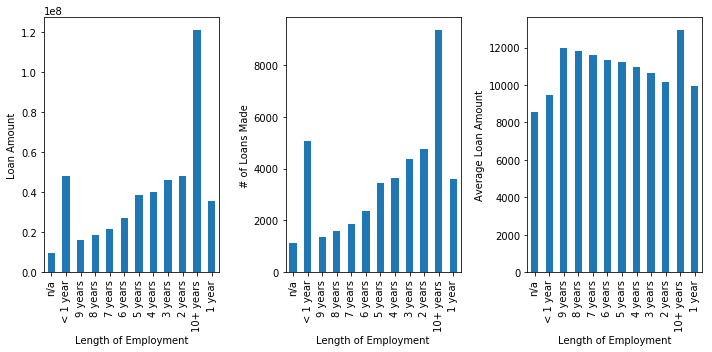

In [20]:
plt.subplot(1,3,1)
all_data.groupby("emp_length").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Loan Amount")
plt.xlabel("Length of Employment")

plt.subplot(1,3,2)
all_data.emp_length.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("# of Loans Made")
plt.xlabel("Length of Employment")

plt.subplot(1,3,3)
all_data.groupby("emp_length").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

The first chart indicates that overall, the sum of all loans provided to end consumers increases with less work history.  This result is understandable as people with less work history are more likely to apply for loans to help make key life purchases that cannot otherwise be funded with their small annual incomes.  The obvious exception here is that most loans were made to people who fell into the "10+ years" bucket: This exception likely stems from this category being a "catch all" bucket, which results in it having the largest number of members.

The second graph indicates that a larger number of loans are made to people with shorter work histories, which again makes sense given that these loanees need to supplement their low annual income.  The large number of loans made to people who fell into "10+ years" bucket helps further confirm the comment in the previous paragraph that more people fall into this "catch all" category--indicating one of the shortcomings to using categorical variables for data classification.  A key note to make, however, about the assumption that more people fall into the "10+ years" category bucket is that that each loan provided within this category is mostly from a unique user and not the same set of people taking out multiple loans.

The third graph indicates that the average loan size increases the greater the length of employment for a loanee.  Such a result indicates that larger loans are made to people with longer work histories because they are deemed to be less of a credit risk and, thus, less likely to default on the loan made.  Also, the larger average loan size to people with greater work histories indicates that such people are likely making larger purchases and therefore requesting larger loans.

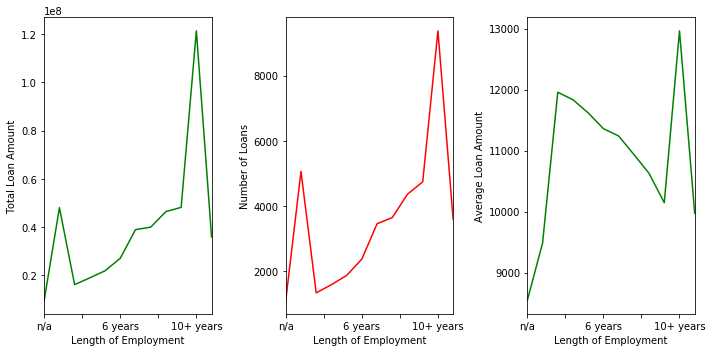

In [43]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
all_data.groupby("emp_length").loan_amnt.sum().sort_index(ascending=False).plot(kind = "line", color = "green")
plt.ylabel("Total Loan Amount")
plt.xlabel("Length of Employment")

plt.subplot(1,3,2)
all_data.emp_length.value_counts().sort_index(ascending=False).plot(kind = "line", color = "red")
plt.ylabel("Number of Loans")
plt.xlabel("Length of Employment")

plt.subplot(1,3,3)
all_data.groupby("emp_length").loan_amnt.mean().sort_index(ascending=False).plot(kind = "line", color = "green")
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

These graphs show the same results as the bar graph above.  This analysis was done to directly contrast the visualization effects of a line versus a bar graph.  Frankly, from the standpoint of helping people grasp the key takeaway for each graph, these line graphs are better as they show the trend in loans across people of varying work histories (sorted by index for direct comparison).

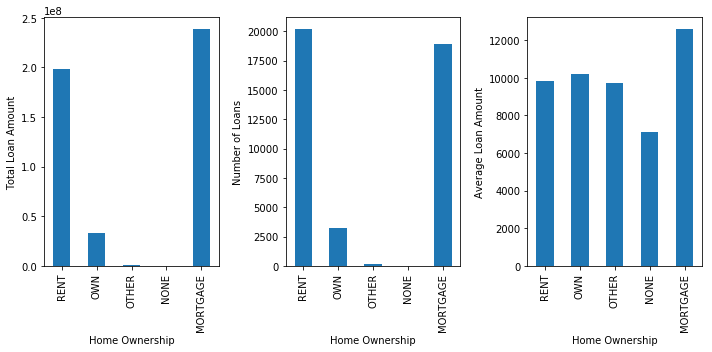

In [4]:
plt.subplot(1,3,1)
all_data.groupby("home_ownership").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Home Ownership")

plt.subplot(1,3,2)
all_data.home_ownership.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Home Ownership")

plt.subplot(1,3,3)
all_data.groupby("home_ownership").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Home Ownership")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

The first chart indicates that the largest loan volume is made to people with mortgages while the second largest loan volume is made to people who are renting.  Such a result is somewhat expected given that most people are either mortgaging a home or renting one--many people do not own their home outright.  These two groups of people are also strained by high monthly payments that can leave them unprepared for emergency expenses that arise through a given year, which would prompt them to use LendingClub for a loan.

The second chart reveals that the most number of loans are made to people that rent followed by those who have a mortgage.  Again, these two categories have the largest number of people and those individuals are likely to need loans as new, unexpected expenses arise.

The last graph indicates that the average loan size was highest for people with mortgages, again not that surprising as such people likely have the highest expenses and biggest families where unexpected expenses can force the need for short or long-term loans.  Interestingly, the average loan size is relatively equal among those who rent, own, or fall in the “other” category; this result could stem from people all having the same type of spending patterns that outstrip their annual earnings.

Income Categories
(0, 20000]             3869.080882
(20000, 40000]         7358.302079
(40000, 60000]        10066.184317
(60000, 80000]        12315.438271
(80000, 100000]       13949.909856
(100000, 120000]      15205.469969
(120000, 150000]      16393.950517
(150000, 200000]      17921.579961
(200000, 10000000]    18986.496350
Name: loan_amnt, dtype: float64


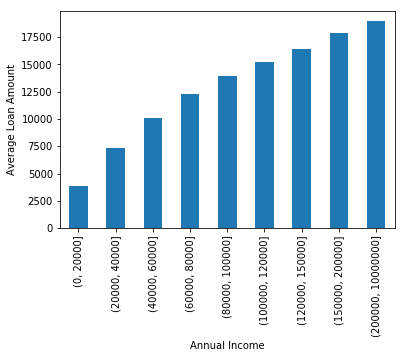

In [22]:
df = pd.DataFrame(all_data)

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 150000, 200000, 10000000]
df["Income Categories"] = pd.cut(df["annual_inc"], bins)
print(df.groupby("Income Categories")["loan_amnt"].mean())

df.groupby("Income Categories")["loan_amnt"].mean().plot(kind="bar")

plt.ylabel("Average Loan Amount")
plt.xlabel("Annual Income")

**Key Takeaway and Analysis:**

This chart indicates that, on average, the largest loans are made to people with the highest annual income.  Such a result indicates that individuals with higher annual incomes have a need for larger loans to meet their higher purchase tendencies.  Also, those people with higher annual incomes are likely deemed a lower credit risk and therefore, larger loans are made to them.

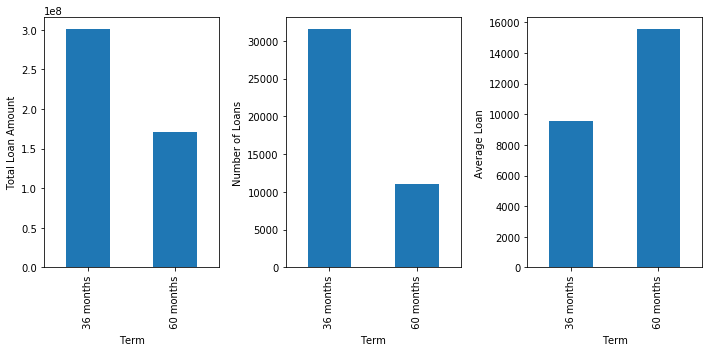

In [23]:
plt.subplot(1,3,1)
all_data.groupby("term").loan_amnt.sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Term")

plt.subplot(1,3,2)
all_data.term.value_counts().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Term")

plt.subplot(1,3,3)
all_data.groupby("term").loan_amnt.mean().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan")
plt.xlabel("Term")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

These three charts indicate that while the total loan volume as well as the number of loans provided were higher for 36 month periods over the 60 month periods, the average loan was higher for 60 months since far fewer loans were made in this term period overall.  The possible conclusions are that lenders prefer providing longer-term loans so they can earn more interest and that fewer loanees want to take out 60-month loans to avoid carrying debt for that length of time.

[]

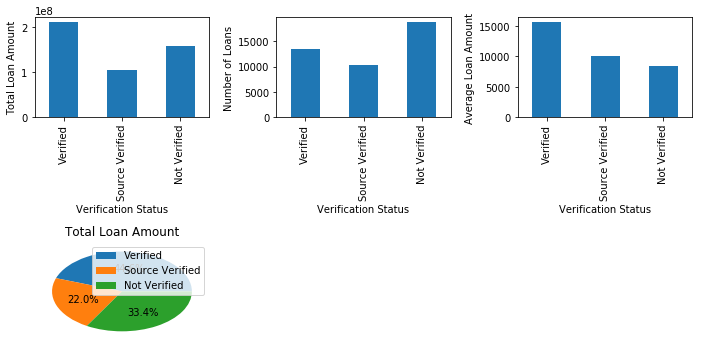

In [48]:
plt.subplot(2,3,1)
all_data.groupby("verification_status").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Verification Status")

plt.subplot(2,3,2)
all_data.verification_status.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Verification Status")

plt.subplot(2,3,3)
all_data.groupby("verification_status").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Verification Status")

plt.subplot(2,3,4)
plt.pie(all_data.groupby("verification_status").loan_amnt.sum().sort_index(ascending=False), autopct="%1.1f%%")
plt.legend(all_data.verification_status, loc="best")
plt.title("Total Loan Amount")

plt.tight_layout()
plt.plot()

**Key Takeaway and Analysis:**

Due to the mixed results in the first two charts, the best takeaway from this analysis is drawn from the third graph, which indicates that the average loan was highest to individuals where income was verified.  For context, "not verified" means that those people did not have their income verified before a loan request was fulfilled; this means that enough people agreed to finance the loan before LendingClub had a chance to formally verify income.  The two other options, "verified" and "source verified," indicate that LendingClub was able to verify the person's income before a loan request was fulfilled.  All loanees' income must be verified before the loan is formally approved by LendingClub, but some loans get funded so quickly (due to investor demand) that the income is only verified after the full loan request is fulfilled and pending final approval by LendingClub.  

The takeaway here is that the high number of "not verified" loans point toward high investor demand and trust in the LendingClub system that incomes are properly verified before a deal is closed.  The pie chart indicates that the number of "not verified" loans is a third of loans made, but, per the LendingClub Web site, this result is largely just due to demand and how the company defines a verified versus non-verified loan.  The third bar chart indicates that the average loan is highest for the verified and source verified loans: A potential explanation is that loanees in those groups are the most prepared to provide the proper documentation ("W2"s and paystubs) required to move into the verified status bucket before their loans requests are completely fulfilled; such prepared loanees are more likely to be making large loan requests to fund their large purchasing needs.

More information is available at https://www.lendingclub.com/public/income-verification.action

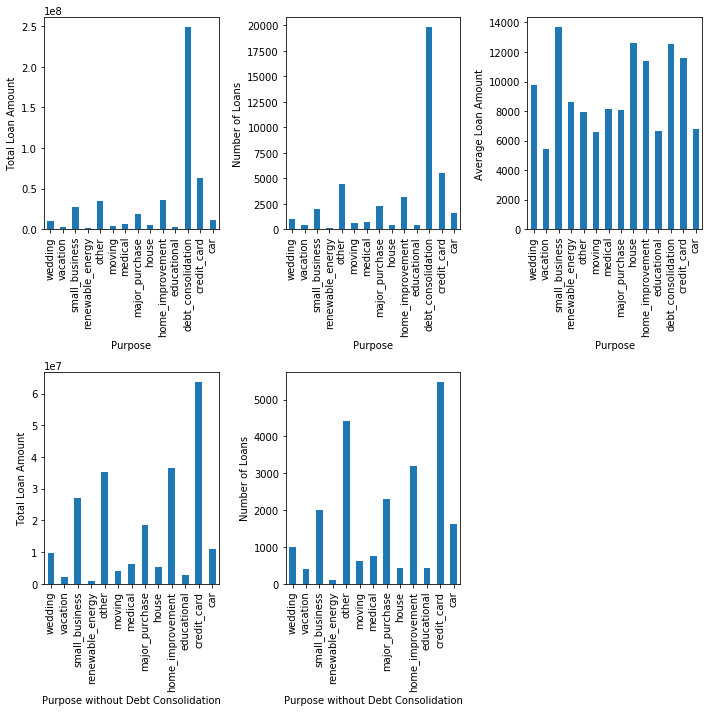

In [7]:
plt.subplot(2,3,1)
all_data.groupby("purpose").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,10))
plt.ylabel("Total Loan Amount")
plt.xlabel("Purpose")

plt.subplot(2,3,2)
all_data.purpose.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,10))
plt.ylabel("Number of Loans")
plt.xlabel("Purpose")

plt.subplot(2,3,3)
all_data.groupby("purpose").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,10))
plt.ylabel("Average Loan Amount")
plt.xlabel("Purpose")

plt.subplot(2,3,4)
df1 = pd.DataFrame(all_data)
df1["Purpose without Debt Consolidation"] = df1[df1["purpose"] != "debt_consolidation"]["purpose"]

df = pd.DataFrame()
df["Total Amount without Debt Consolidation"] = df1.groupby("Purpose without Debt Consolidation").loan_amnt.sum()
df["Total Amount without Debt Consolidation"].sort_index(ascending=False).plot(kind="bar", figsize=(10,10))
plt.ylabel("Total Loan Amount")

plt.subplot(2,3,5)
df["Number of Loans Made"] = df1["Purpose without Debt Consolidation"].value_counts()
df["Number of Loans Made"].sort_index(ascending=False).plot(kind="bar", figsize=(10,10))
plt.ylabel("Number of Loans")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

The first graph indicates that the highest dollar value of loans is made to for debt consolidation purposes.  The second highest purpose, credit card payoff, is a distant second indicating that a visual of the "total loan amount" graph without the debt consolidation portion would provide a clearer view of the contrast among the other purposes stated by loanees.  Weddings, small businesses, major purchases, and home improvement are all noticeably high as these are either key life expenses or unexpected expenses that require loanees to make a purchase without the ability to wait, plan, and save.  

The second graph indicates that the largest number of loans are made for debt consolidation purposes, which again skews the visuals of the graph.  Again, weddings, small business, home improvement, and cars are the other primary purposes that drive people to seek loans.

The third graph indicates that the average loan size is largest for small businesses, followed closely by houses, debt consolidation, credit card, and home improvement.  Such a result does not come as a surprise as those purposes are typically the most expensive, driving a high average loan size.

The last two bar graphs in the second row of the subplots show a visual of the total loans made as well as the number of loans made with the "debt consolidation" purpose removed.  The removal of "debt consolidation" helps provide a better visual of the contrasts among the other purpose categories.

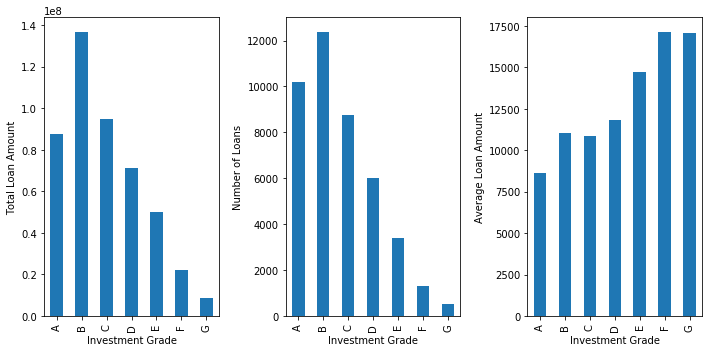

In [44]:
plt.subplot(1,3,1)
all_data.groupby("grade").loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Investment Grade")

plt.subplot(1,3,2)
all_data.grade.value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Investment Grade")

plt.subplot(1,3,3)
all_data.groupby("grade").loan_amnt.mean().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Investment Grade")

plt.tight_layout()
plt.show()

**Key Takeaway and Analysis:**

The first chart indicates that with the exception of the "A" and "B" grade categories, total loan volume decrease as the investment grade declines.  Investors are less willing to make loans to higher risk loanees.

The second chart indicates that with the exception of the "B" grade category, the number of loans decreases as the investment grade declines.  Investors are less willing to loan to higher risk loanees.

The third chart indicates that the average loan size was highest for the F and G-rated investment loans and that the average loan size generally decreases from A - G.  The results of this bar chart showing average loan amount increasing per lower investment grade is difficult to explain.  A potential reason for the results could stem from loanees with lower credit ratings needing larger amounts of money to bail them out of precarious financial situations.  More analysis should be done to determine the relationship between investment grade and purpose for the loan as that might shed some light on why the average loan amount is so high for the lowest rated categories.

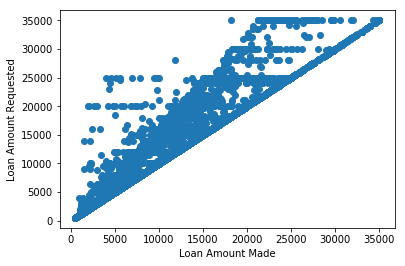

In [45]:
plt.scatter(x=all_data.funded_amnt, y=all_data.loan_amnt)
plt.xlabel("Loan Amount Made")
plt.ylabel("Loan Amount Requested")
plt.show()

**Key Takeaway and Analysis:**

This scatter chart, which shows the relationship between loan amount requested and the loan amount provided indicates some heteroskedasticity, meaning the one variable is not a good predictor of the other.  While there is some relation due to many loanees getting funding for exactly the loan amount requested, when the differences differ, they are not consistent.

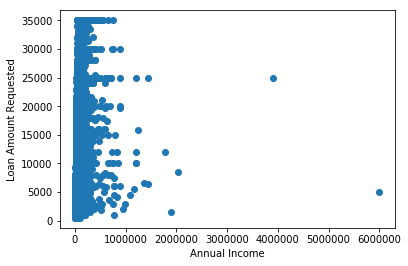

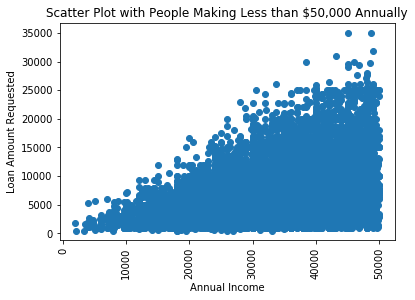

In [38]:
plt.scatter(x=all_data.annual_inc, y=all_data.loan_amnt)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount Requested")
plt.show()

df = pd.DataFrame(all_data)
df["annual income with condition"] = all_data[all_data["annual_inc"]<50000]["annual_inc"]
df["loan amount with income condition"] = all_data[all_data["annual_inc"]<50000].loan_amnt

plt.scatter(x=df["annual income with condition"], y=df["loan amount with income condition"])
plt.xticks(rotation=90)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount Requested")
plt.title("Scatter Plot with People Making Less than $50,000 Annually")
plt.show()

**Key Takeaway and Analysis:**

The first graph shows that for a loanees’ annual income and the loan amount requested, there is a rather strong correlation, but further analysis is needed to better visualize this relation due to the impact that the outliers (those with high income) have on skewing the visual.  Note that the two individuals making 4,000,000 and 6,000,000 in annual income skew the graph most significantly.

The second graph, which excludes all people with annual incomes at 50,000 or more, provides a clearer picture of the relation between annual income and loan amount requested.  Upon closer inspection, the correlation between annual income and loan amount requested is not as strong as previously suspected in the first graph.  While there appears to be some correlation between higher income and a larger loan request, in too many other instances, the loan requests were small even for people making up to 50,000 annually.  This second graph demonstrates that an individual's annual income is a good indication of the maximum amount of money the person would request in a loan, but not the actual amount requested. 

**Second Analysis-->**

Hypothesis – Loans made to people with lower credit ratings are more likely to default.

Key Question to Test: What is the relationship between loan status, grade, and sub grade?  Furthermore, what is the charge off rate per purpose and/title of use for each consumer?

       Number of Charge Offs  Sum of Loans Made to Charged Off Accounts  \
grade                                                                     
A                        602                                  4695550.0   
B                       1433                                 15659725.0   
C                       1356                                 15029400.0   
D                       1130                                 13814375.0   
E                        725                                 11543500.0   
F                        323                                  6260900.0   
G                        101                                  1872825.0   

       Sum of All Loans Made  
grade                         
A                   85295150  
B                  133714950  
C                   93102750  
D                   70068700  
E                   48061025  
F                   21511400  
G                    8542175  


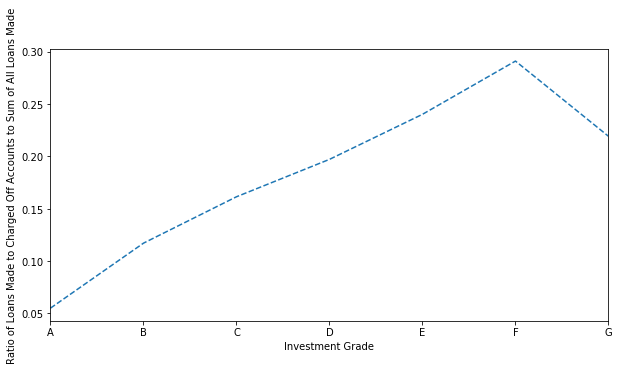

In [48]:
df = pd.DataFrame(all_data)

df["Loans Made to Charged Off Accounts"] = df[df["loan_status"]=="Charged Off"].loan_amnt

new_dataframe = pd.DataFrame()

new_dataframe["Number of Charge Offs"] = df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
new_dataframe["Sum of Loans Made to Charged Off Accounts"] = df.groupby("grade")["Loans Made to Charged Off Accounts"].sum()
new_dataframe["Sum of All Loans Made"] = df.groupby("grade")["funded_amnt"].sum()
new_dataframe["Ratio of Loans Made to Charged Off Accounts to Sum of All Loans Made"] = new_dataframe["Sum of Loans Made to Charged Off Accounts"] / new_dataframe["Sum of All Loans Made"]
print(new_dataframe.iloc[:,0:3])

new_dataframe["Ratio of Loans Made to Charged Off Accounts to Sum of All Loans Made"].plot(kind="line", linestyle="--", figsize=(10,5))
plt.ylabel("Ratio of Loans Made to Charged Off Accounts to Sum of All Loans Made")
plt.xlabel("Investment Grade")

**Key Takeaway and Analysis:**

This line graph indicates that as the investment grade decreases, the ratio of loan amounts that are charged off to the total loan volume made in each investment grade increases.  This result is understandable given that higher risk loanees are more likely to default than their higher investment grade counterparts.  The drop-off, however, between the F and G investment grades does not follow the logical trend expected: Given the lower investment grade, one would expect G to have a higher ratio than F.  Nevertheless, a potential explanation could stem from the low dollar volume of loans that are made to the lowest investment grade, which simply leaves a lower chance that investment grade group defaults in the first place.

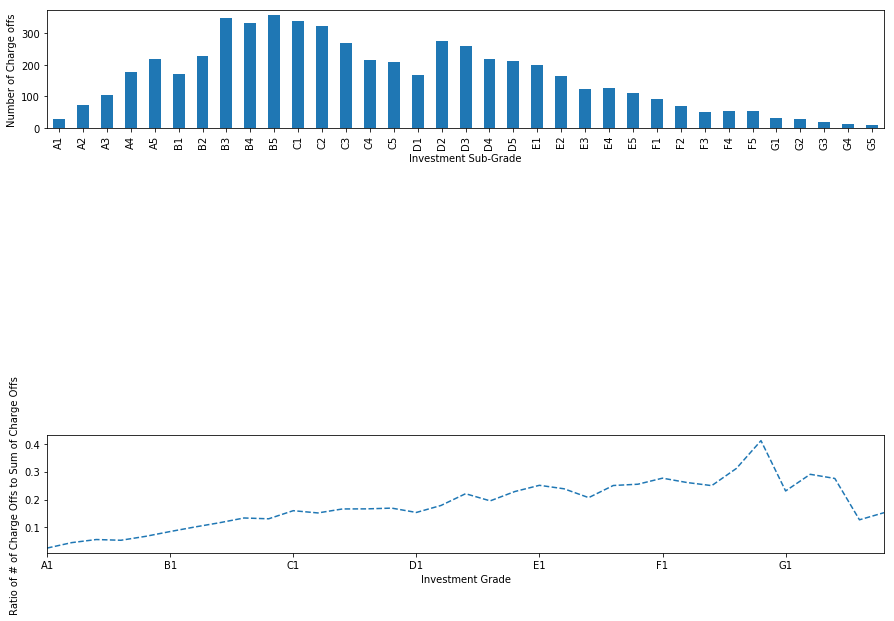

In [42]:
plt.subplot(4,1,1)
all_data.groupby("sub_grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count()).plot(kind="bar", figsize=(15,10))
plt.ylabel("Number of Charge offs")
plt.xlabel("Investment Sub-Grade")

df = pd.DataFrame(all_data)

df["Loans Made to Charged Off Accounts"] = df[df["loan_status"]=="Charged Off"].loan_amnt

new_dataframe = pd.DataFrame()

new_dataframe["Number of Charge Offs"] = df.groupby("sub_grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
new_dataframe["Sum of Loans Made to Charged Off Accounts"] = df.groupby("sub_grade")["Loans Made to Charged Off Accounts"].sum()
new_dataframe["Sum of All Loans Made"] = df.groupby("sub_grade")["funded_amnt"].sum()
new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"] = new_dataframe["Sum of Loans Made to Charged Off Accounts"] / new_dataframe["Sum of All Loans Made"]

plt.subplot(4,1,4)
new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"].plot(kind="line", linestyle="--", figsize=(15,10))
plt.ylabel("Ratio of # of Charge Offs to Sum of Charge Offs")
plt.xlabel("Investment Grade")

**Key Takeaway and Analysis:**

The first graph, the bar graph, reveals that the largest number of "Charge Offs" occurred in the investment sub-grade level of B3-C2.  Note, that while this group is more in the mid-to-High point of investment grade riskiness it has the highest number of "charge offs" due to those categories having the largest number of loans made to loanees, which will become more evident in looking at the second graph.

The second graph, the line graph, indicates that the trend in the ratio of charge offs to loans made in each investment category generally increases as the investment grade declines.  Again, as in the previous analysis, we see that the probability of a charge off declines the farther into the G-investment grade a loanee falls, but the likely explanation is that so few investments are made in this category that there is a lower probability of a charge off.

**Third Analysis-->**

Hypothesis – More loans are made during the fourth quarter of October, November, and December since those months fall during the holiday season.  Also, most people are seeking loans in the state of CA due to its sheer size and proximity to the tech sector.

Key Question to Test: Is there any seasonality in the data (note, all data is from 2017)?  What is the breakout of number of loans made by state?

Key Takeaway: This chart indicates that more loans are made toward the end of the year as the holiday seasons approach.
month
1     27606650
2     27735425
3     32443425
4     32566000
5     34008300
6     36454075
7     38355050
8     40775800
9     43888100
10    48619900
11    51736500
12    57512125
Name: loan_amnt, dtype: int64


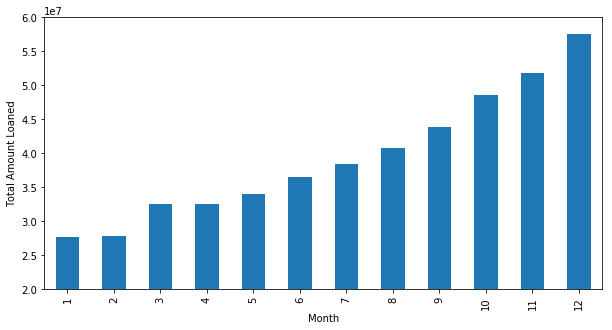

In [66]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

unique_months = all_data["month"].dt.month

all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Amount Loaned")
plt.ylim(20000000, 60000000)
plt.xlabel("Month")

print(all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index())
#This prints all the months from the all_data["month"] column.

**Key Takeaway and Analysis:**

This chart indicates that more loans are made toward the end of the year as the holiday seasons approach.  Given that the Thanksgiving and Christmas holidays fall in months 11 and 12, the results are not surprising.

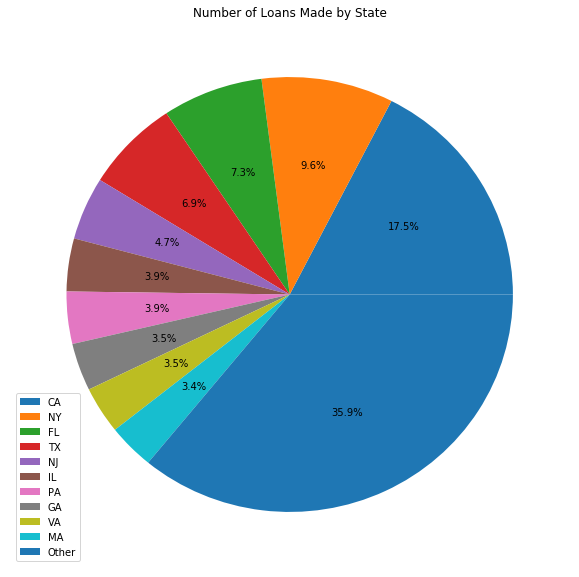

In [49]:
state_counts = pd.DataFrame(all_data.addr_state.value_counts())
other = int(state_counts[10:].sum())
state_counts = state_counts[:10]
state_counts.loc[11] = other

state_counts = state_counts.rename(index={11:"Other"})

plt.figure(figsize=(10,10))
plt.pie(state_counts, autopct="%1.1f%%")
plt.legend(state_counts.index)
plt.title("Number of Loans Made by State")

**Key Takeaway and Analysis:**

The largest number of loans were made in the state of California, followed by New York, Florida, and Texas.  The result of California being the state with the highest number of loans is not surprising given that one in eight Americans live in that state and that California is the tech and Hollywood center of the country.

**Conclusion:**

The capstone project on LendingClub makes several key revelations on the relationship between the loan (loan volume, number of loans, and average loan size) and various loanee attributes.  The data shows that there is a general increase in loan volume size as length of employment decreases, that the loan volume made to people who rent and pay mortgages is highest, that the loan volume increases with annual income, and that LendingClub has a unique classification of "verified" versus "not verified" income status.

The charge off analysis, which reveals that a higher percentage of loans are charged off given a lower investment grade, indicates that LendingClub is doing well in its analysis of people that have a high credit risk.  However, the company could do more to better analyze the riskiest loanees and, as a result, help further reduce the charge off risk born by investors on the platform.

With more time and knowledge in statistics, further analysis could be done to understand the key independent variables that cause a loan to be charged off (the dependent variable).  With a better understanding of how to run logistical regressions in Python and Pandas, such a follow-up analysis would be ideal to conduct after successfully completing the full bootcamp course.